In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix

In [83]:
#EDA
Stroke_dataset = pd.read_csv('Stroke Dataset.csv')

In [84]:
data.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4213,Female,24.0,0,0,No,Private,Rural,123.89,24.1,smokes,0
4148,Male,18.0,0,0,No,Govt_job,Urban,106.54,27.0,never smoked,0
1921,Male,44.0,0,0,Yes,Private,Rural,95.46,31.4,smokes,0
954,Male,50.0,0,0,No,Govt_job,Rural,92.81,26.6,never smoked,0
4207,Male,40.0,0,0,Yes,Private,Rural,201.96,30.1,Unknown,0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [86]:
Stroke_dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [87]:
data.shape

(5110, 11)

In [90]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [91]:
data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [92]:
data.duplicated().sum()

0

In [93]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [94]:
#Handling Missing Values
data.bmi.fillna(data.bmi.mean(),inplace=True)

In [95]:
data.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4963,Female,34.0,0,0,Yes,Private,Urban,83.07,28.0,formerly smoked,0
2138,Male,72.0,0,0,Yes,Private,Urban,92.59,24.6,formerly smoked,0
1213,Female,78.0,1,0,Yes,Self-employed,Rural,59.20,29.1,Unknown,0
2060,Male,59.0,0,0,Yes,Private,Rural,93.90,42.2,never smoked,0
2482,Female,30.0,0,0,Yes,Private,Rural,72.49,25.8,never smoked,0


In [96]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Figure size 2000x1500 with 0 Axes>

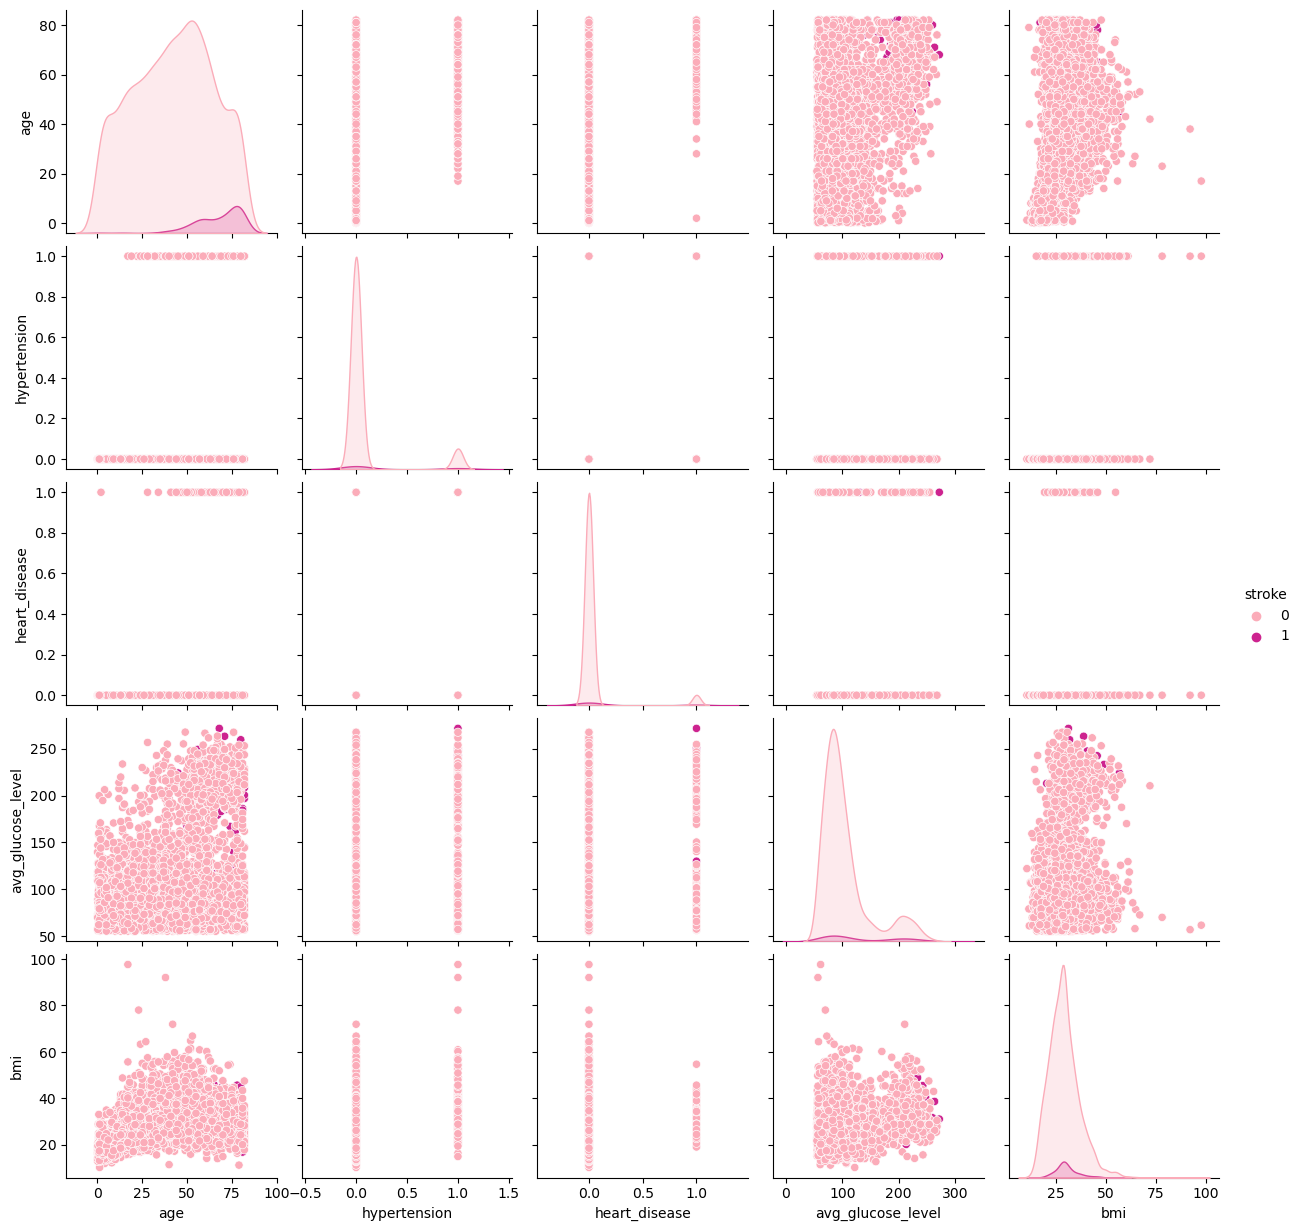

In [97]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data,hue="stroke",palette='RdPu');

In [98]:
datanumerical=data[['age','avg_glucose_level','bmi']]
datacategorical=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

Text(0.5, 1.0, 'kde for age, avg_glucose_level and bmi')

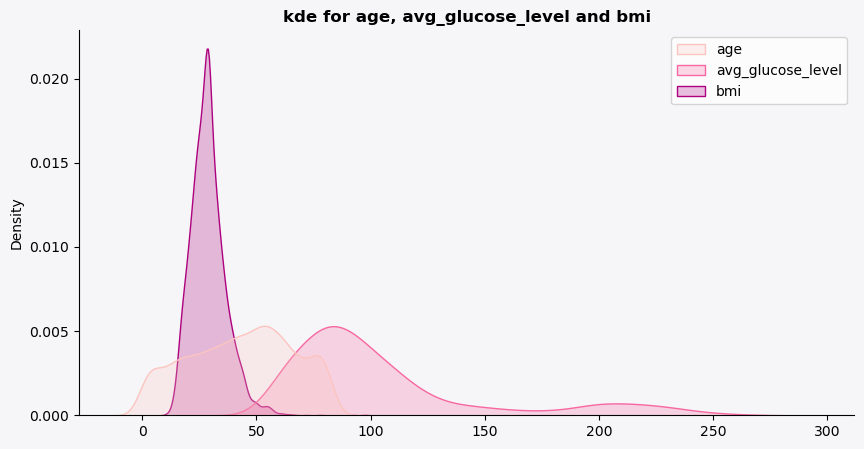

In [99]:
fig,ax=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f7')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)

sns.kdeplot(data=datanumerical,shade=True,palette='RdPu')
plt.title("kde for age, avg_glucose_level and bmi",weight='bold')

In [100]:
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

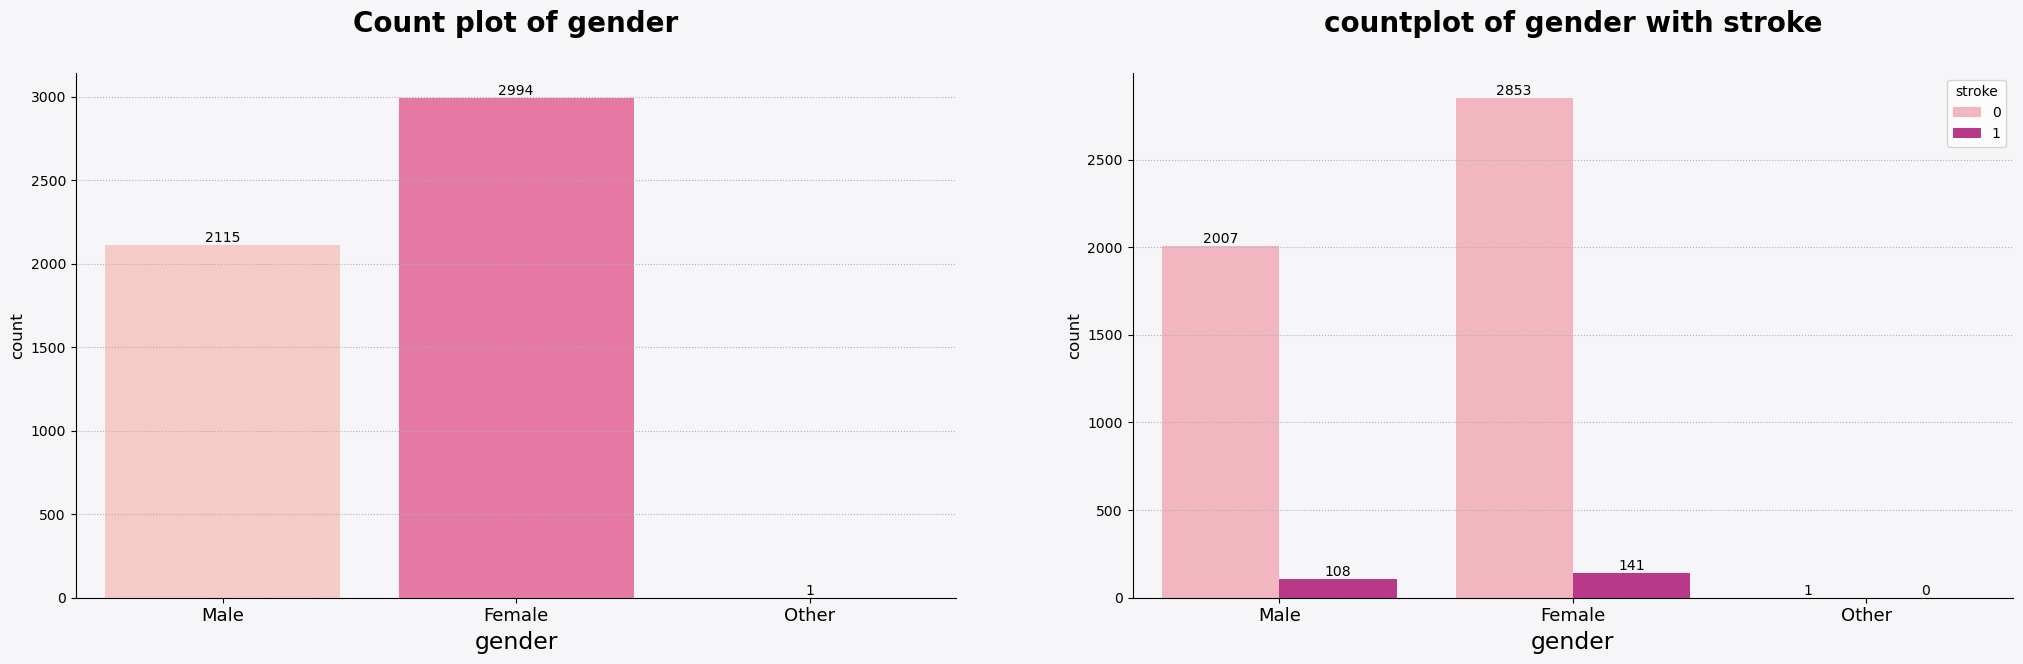

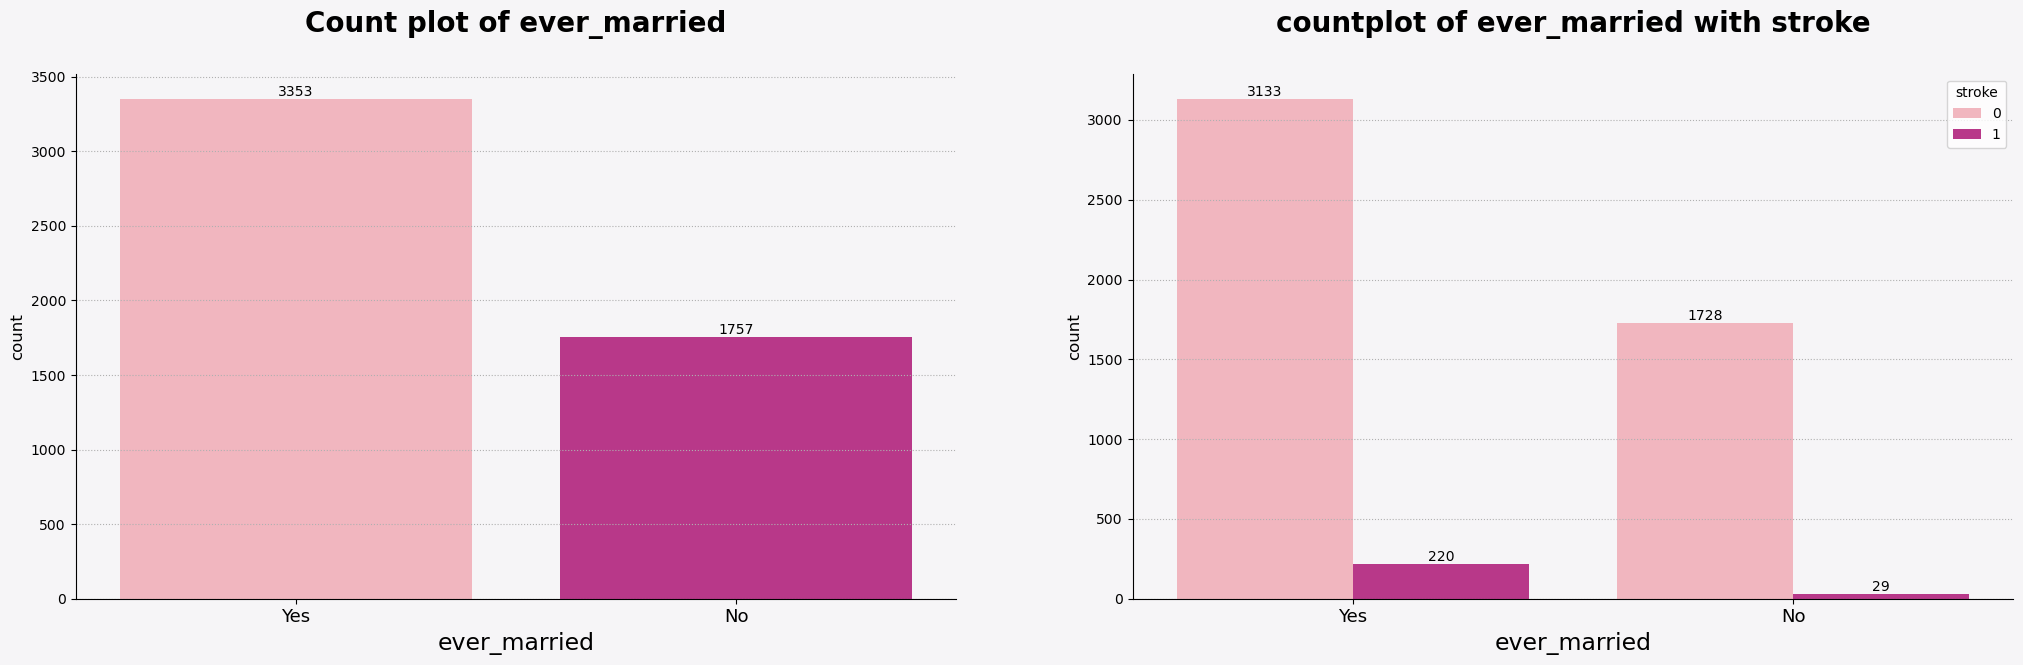

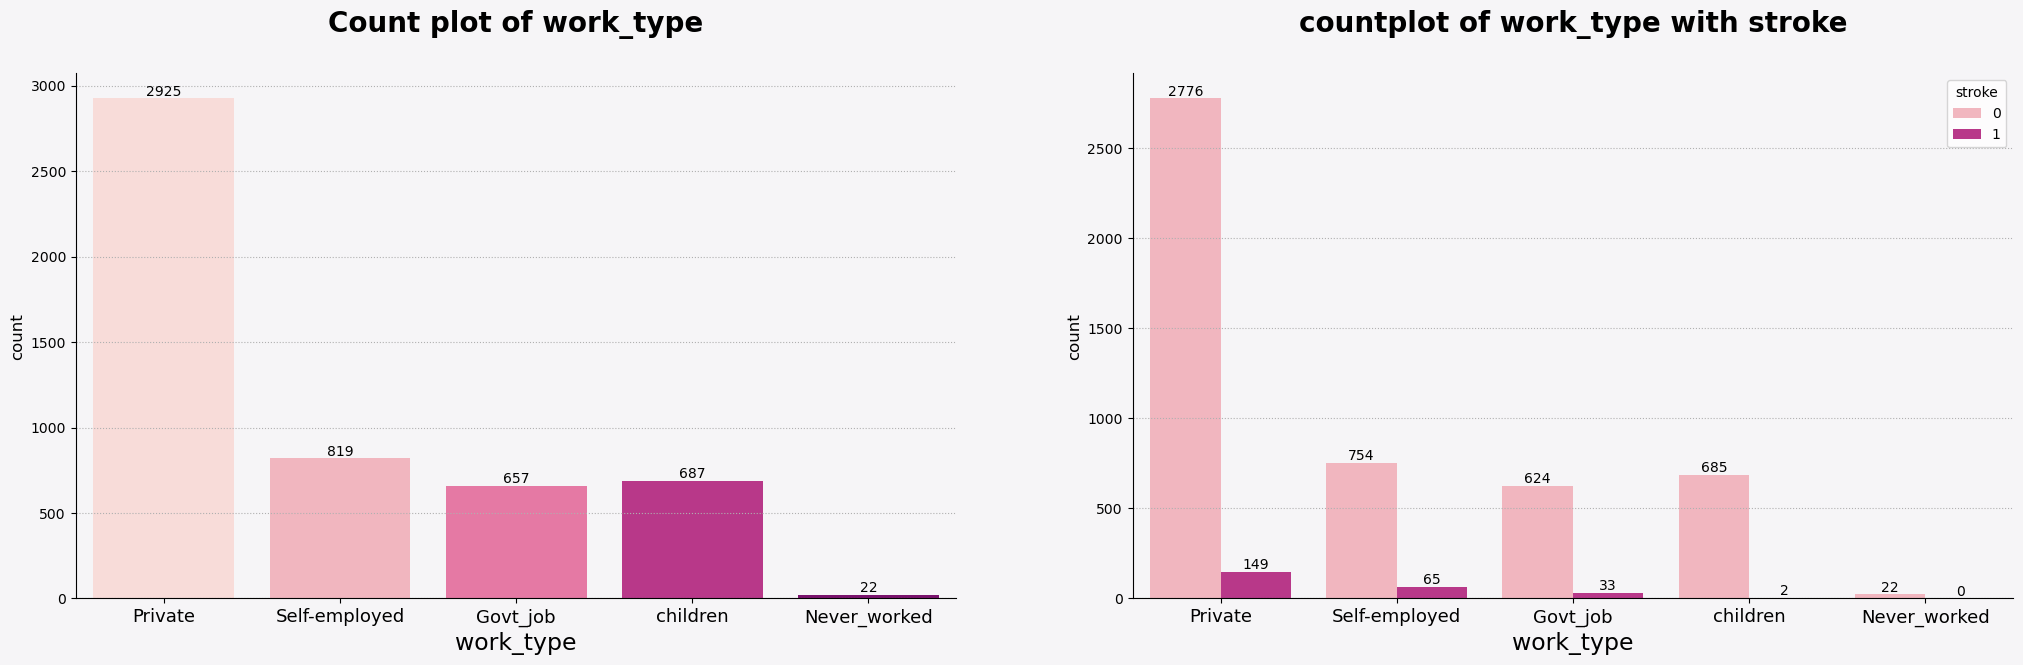

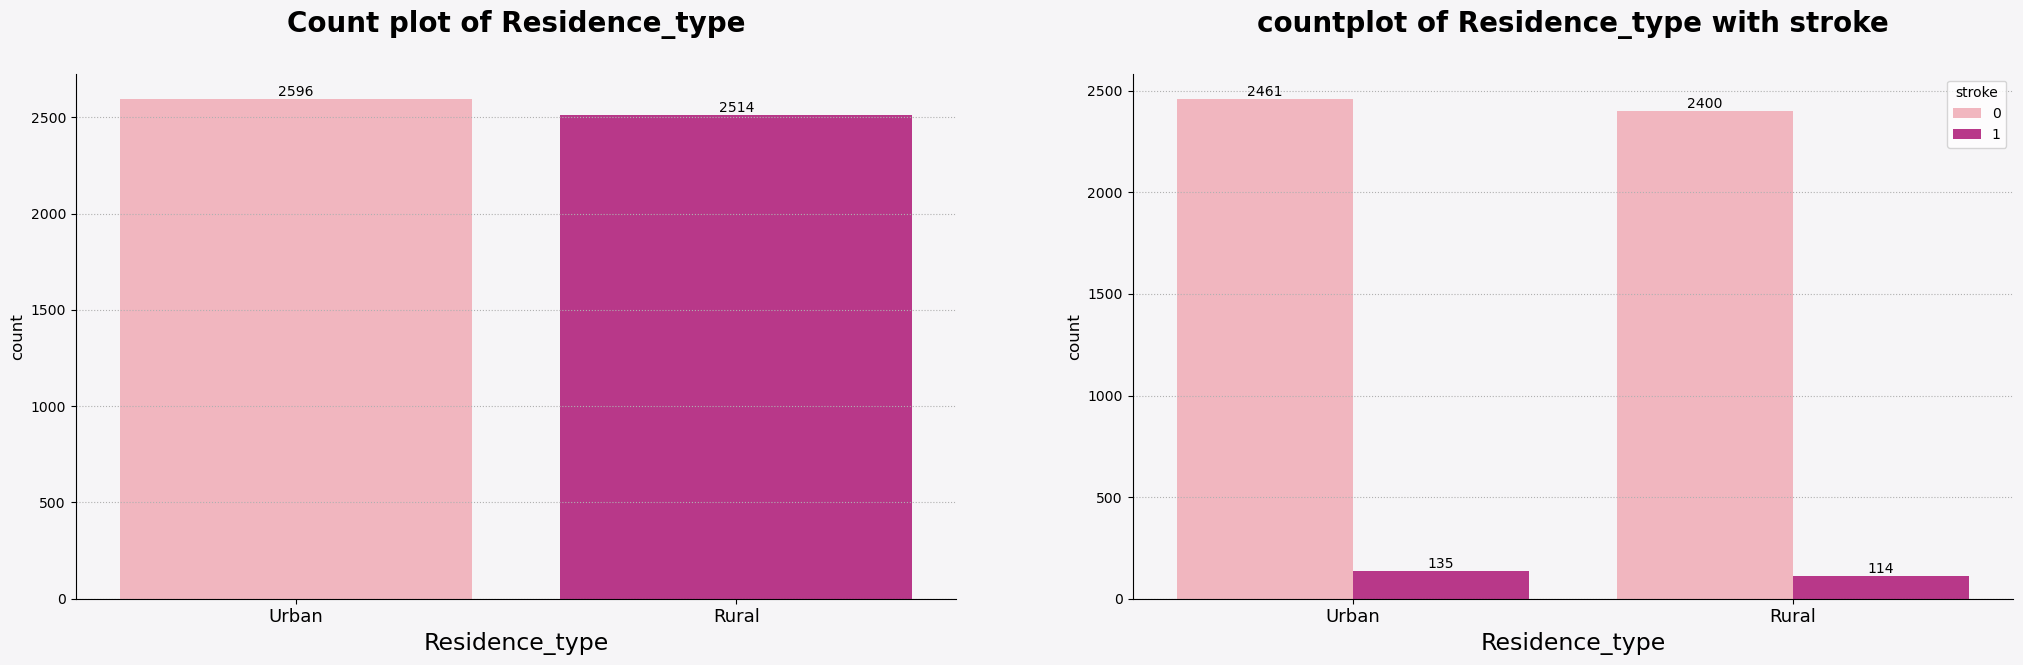

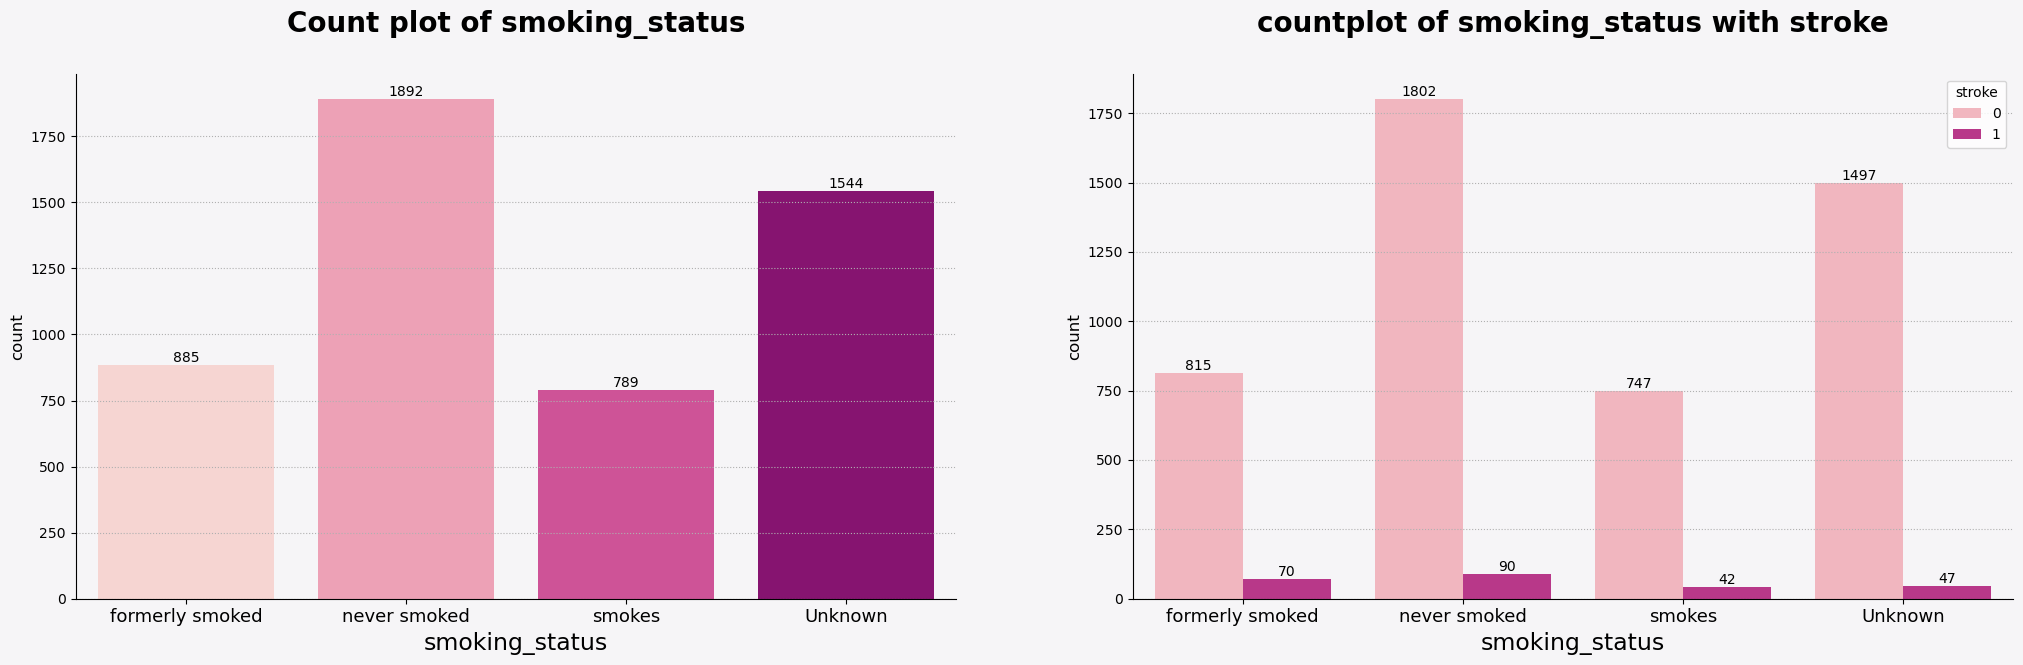

In [101]:
for i in data.columns:
    if data[i].dtype == "object":
        
        fig=plt.figure(figsize=(25,15))
        fig.patch.set_facecolor("#f6f5f7")
        
        xx=plt.subplot(2,2,1)
        xx.set_facecolor("#f6f5f7")
        x=sns.countplot(data=data, x=i,palette='RdPu')
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        for x in ["top","right"]:
            xx.spines[x].set_visible(False)
        xx.grid(linestyle=':',axis='y')
        
        vv=plt.subplot(2,2,2)
        vv.set_facecolor("#f6f5f7")
        v=sns.countplot(data=data,x=i,hue="stroke",palette='RdPu')
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with stroke\n",fontsize=20,weight="bold" )
        
        for v in ["top","right"]:
            vv.spines[v].set_visible(False)
        vv.grid(linestyle=':',axis='y')
        plt.show()

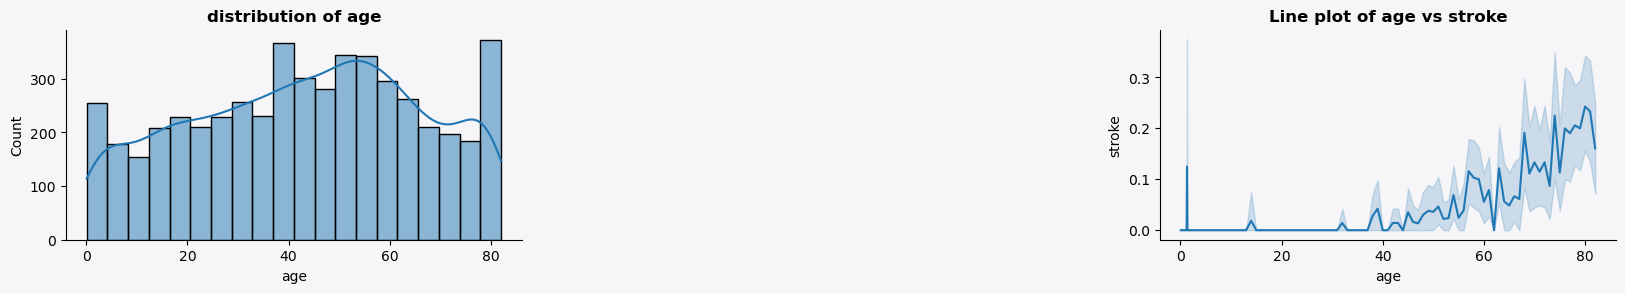

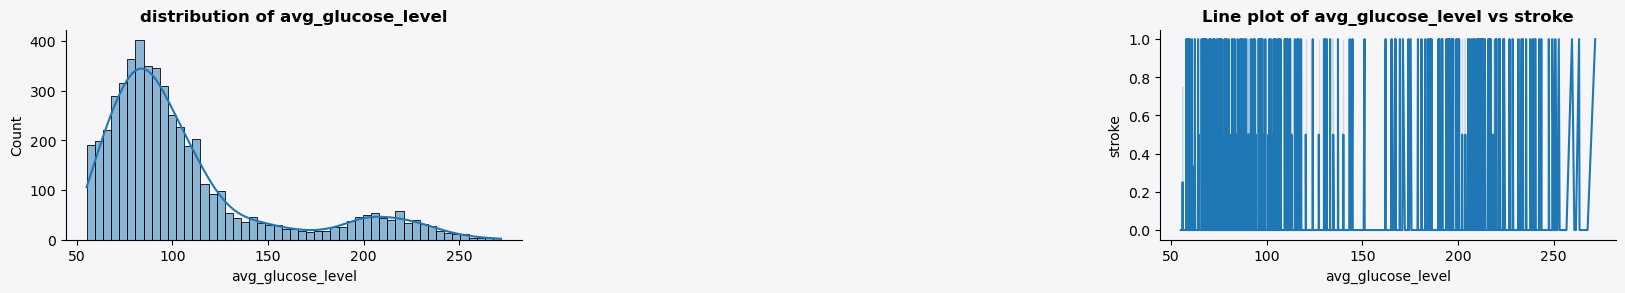

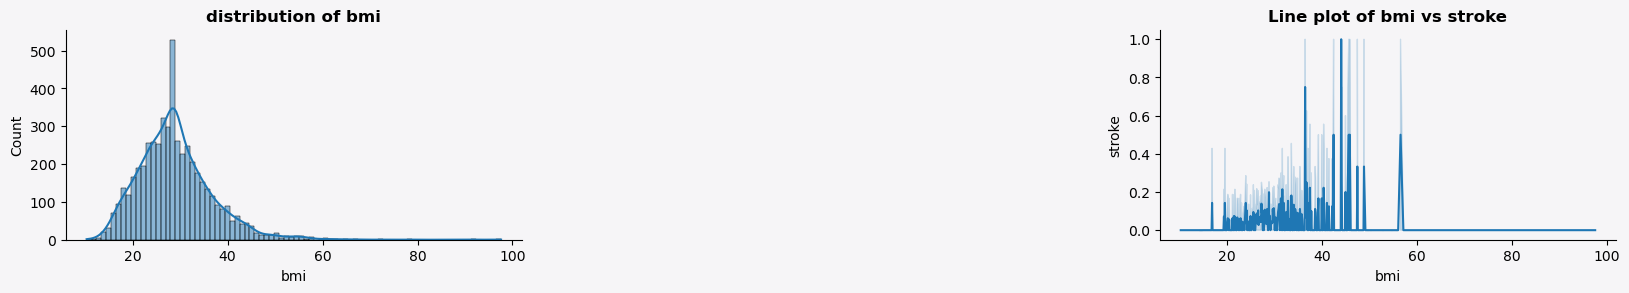

In [102]:
for i in datanumerical:
    fig=plt.figure(figsize=(20,6))
    fig.patch.set_facecolor("#f6f5f7")
        
    v=plt.subplot(2,3,1)
    v.set_facecolor('#f6f5f7')
    vv=sns.histplot(data=datanumerical,x=i,kde=True,palette='RdPu')
    plt.title(f"distribution of {i}",weight='bold')
    for vv in ["top","right"]:
        v.spines[vv].set_visible(False)
    
    l=plt.subplot(2,3,3)
    l.set_facecolor("#f6f5f7")
    ll=sns.lineplot(data=data, x=i, y="stroke",palette='RdPu')
    for ll in ["top","right"]:
        l.spines[ll].set_visible(False)
    plt.title(f"Line plot of {i} vs stroke",weight='bold')

In [103]:
pd.crosstab(data.gender,data.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,399,11,1754,504,326
Male,258,11,1170,315,361
Other,0,0,1,0,0


In [104]:
pd.crosstab(data.gender,data.ever_married)

ever_married,No,Yes
gender,,
Female,993,2001
Male,763,1352
Other,1,0


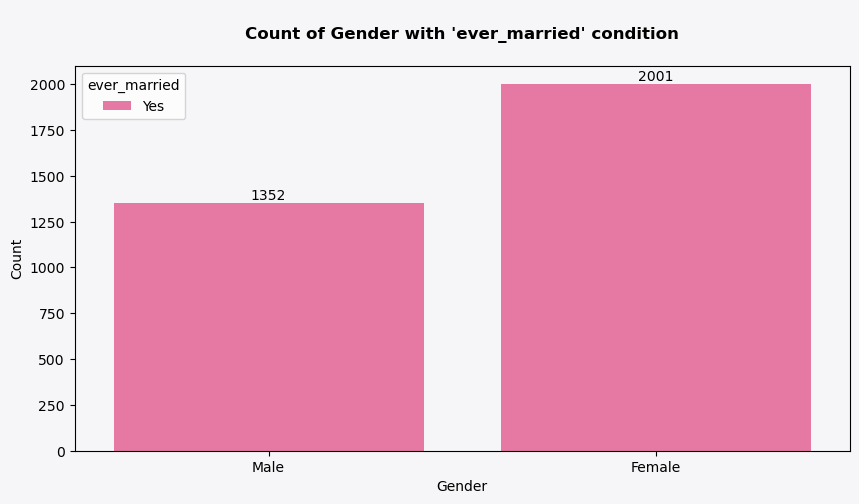

In [105]:
fig,x=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
x.set_facecolor('#f6f5f7')
j = data[data['ever_married'] == "Yes"]
x=sns.countplot(data=j, x="gender", palette='RdPu', hue='ever_married')
for i in x.containers:
    x.bar_label(i)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("\nCount of Gender with 'ever_married' condition\n",weight="bold")
plt.show()

In [106]:
#Data Preprocessing
x=data.drop("stroke",axis=1)
y=data.stroke

In [107]:
x.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.200000,Unknown


In [108]:
y.tail()

5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, dtype: int64

In [109]:
#encode the string columns
l=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)

In [110]:
x.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,0,101,1,0,1,2,1,1360,162,2
5106,0,102,0,0,1,3,1,3030,274,2
5107,0,56,0,0,1,3,0,1314,180,2
5108,1,72,0,0,1,2,0,3363,129,1
5109,0,65,0,0,1,0,1,1454,135,0


In [111]:
#Data scaling
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [112]:
x

array([[ 1.18807255,  1.03951283, -0.32860186, ...,  1.78017003,
         1.0601011 , -0.35178071],
       [-0.840344  ,  0.7795668 , -0.32860186, ...,  1.54302885,
         0.00597702,  0.58155233],
       [ 1.18807255,  1.60272924, -0.32860186, ...,  0.54287232,
         0.50601024,  0.58155233],
       ...,
       [-0.840344  , -0.34686602, -0.32860186, ..., -0.51521182,
         0.24923642,  0.58155233],
       [ 1.18807255,  0.34632341, -0.32860186, ...,  1.33937707,
        -0.43999855, -0.35178071],
       [-0.840344  ,  0.04305303, -0.32860186, ..., -0.38849515,
        -0.35891208, -1.28511375]])

In [113]:
#Split Data into train and test
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,shuffle=True,test_size=0.1,random_state=42)

In [114]:
x_tr.shape

(4599, 10)

In [115]:
x_tst.shape

(511, 10)

In [116]:
#RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(x_tr,y_tr)
model2.score(x_tr,y_tr)

1.0

In [117]:
model2.score(x_tst,y_tst)

0.9452054794520548

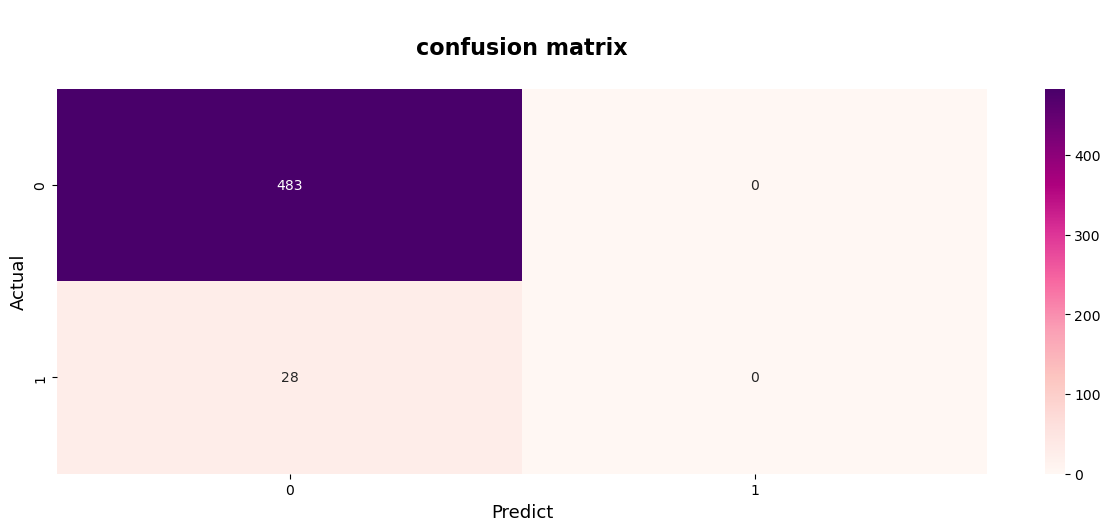

In [118]:
plt.figure(figsize=(15,5))
p2=model2.predict(x_tst)
c2=confusion_matrix(y_tst,p2)
sns.heatmap(c2,annot=True, fmt='d', cmap="RdPu")
plt.title("\nconfusion matrix\n", fontsize=16, weight="bold")
plt.xlabel("Predict", fontsize=13)
plt.ylabel("Actual", fontsize=13);